# Intelligent Plant App Store and Data Core Client (Python)

## Setup
- Register as a developer with the intelligent plant app store.
- Create a new app by clicking "+" under Developer > Applications
- Add the URL of the current page as an authorized redirect URL
- Replace the app ID below with the ID of your app


This sheet was testsed on "IP Datasource 2"

In [7]:
app_id = "668c0bf091154eae89fd018e1f060daa"

Import libraries we're going to use

In [1]:
import math
import urllib.parse
from functools import reduce

import IPython.display as display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Import the Intelligent Plant App Store and Data Core clients.

In [2]:
import intelligent_plant.app_store_client as app_store_client
import intelligent_plant.utility as utility

Import the modules necessary for generating the log in URL

Get the URL if this notebook

In [3]:
current_url = None

In [4]:
%%javascript
IPython.notebook.kernel.execute("current_url = '" + window.location + "'");

<IPython.core.display.Javascript object>

Check the URL to see if it has the access token.

If it doesn't: generate a login link

In [5]:
parsed = urllib.parse.urlparse(current_url)
token = None

try:
    token = urllib.parse.parse_qs(parsed.fragment)['access_token'][0]
except:
    print("Token is not valid")
    print(token)

if (not token):
    url = app_store_client.get_implicit_grant_flow_url(app_id, current_url, ["UserInfo", "DataRead"])
    print("Click this link to log in")
    print(url)

In [6]:
app_store = app_store_client.AppStoreClient(token, None)

In [7]:
data_core = app_store.get_data_core_client()

## App Store
Instatiate the appstore client

These example queries are based on the functions in examples/example_queries.py

Fetch the current user data

In [8]:
app_store.get_user_info()

{'ApplicationUserId': '48bafa11-ce56-4bdc-9e5a-088ee1c36f56',
 'UserId': '48bafa11-ce56-4bdc-9e5a-088ee1c36f56',
 'FirstName': 'Ross',
 'LastName': 'Kelso',
 'FormattedName': 'Ross RK. Kelso',
 'Industry': None,
 'Org': 'Intelligent Plant',
 'LastLogIn': '2019-08-01T08:57:42.823',
 'PicUrl': 'https://appstore.intelligentplant.com/profilepic/48bafa11-ce56-4bdc-9e5a-088ee1c36f56',
 'InfoAll': None,
 'VerificationStatus': 'Unverified',
 'CreditBalance': 98158.5,
 'Email': None,
 'HasSharedApp': False,
 'HasSharedAppStore': False}

Fetch the current user's balance

In [9]:
app_store.get_user_balance()

98158.5

## Data Core

These example queries are based on the functions in examples/example_queries.py

Fetch data sources matching the filter '*' (so all of them)

In [10]:
data_sources = data_core.get_data_sources(["*"])
dsns = list(map(lambda x: x["Name"]["DisplayName"], data_sources))
dsns

['IP Datasource', 'IP Datasource 2']

IP Datasource 2 is used for the remainder of these examples

Please ensure that it is the IP Datasource 2 is authroized (i.e. in the above list)

In [11]:
if (not any(list(map(lambda x: x == 'IP Datasource 2', dsns)))):
    print ("Please authorize IP Datasource 2 for Python API Test https://appstore.intelligentplant.com/Security/Apps")

In [12]:
dsn = "IP Datasource 2"

Fetch all the tags in the "IP Datasource 2" data source. TPage size is 113 because that is the number of tags in the data source.

In [15]:
tags = data_core.get_tags(dsn, 1, 113)
tags

[{'Id': 'Air Scour Blowers_Outlet_PI',
  'Name': 'Air Scour Blowers_Outlet_PI',
  'Description': '',
  'UnitOfMeasure': '',
  'Properties': {'index': {'Value': 1,
    'Name': 'index',
    'Category': 'General',
    'Description': 'The CSV field index for the tag.',
    'DisplayIndex': 0,
    'IsReadOnly': True}},
  'DigitalStates': [],
  'IsMetaTag': False},
 {'Id': 'Antifoam Inj Pump A_PI',
  'Name': 'Antifoam Inj Pump A_PI',
  'Description': '',
  'UnitOfMeasure': '',
  'Properties': {'index': {'Value': 4,
    'Name': 'index',
    'Category': 'General',
    'Description': 'The CSV field index for the tag.',
    'DisplayIndex': 0,
    'IsReadOnly': True}},
  'DigitalStates': [],
  'IsMetaTag': False},
 {'Id': 'Antifoam Inj Pump B_PI',
  'Name': 'Antifoam Inj Pump B_PI',
  'Description': '',
  'UnitOfMeasure': '',
  'Properties': {'index': {'Value': 5,
    'Name': 'index',
    'Category': 'General',
    'Description': 'The CSV field index for the tag.',
    'DisplayIndex': 0,
    'IsRe

We can use the first results as examples for the rest of this note book.

In [54]:
tag = tags[0]["Id"]

Take the first available tag and do a historical query over the last 30 days

The parameters are:
- Fully Qualified data source name
- Tag  (can be a list)
- Data function, "plot", "interp", "max", "min", "avg" and "raw" (raw is not recommended due to high volumes of data)
- The query start time (can be relative e.g. "-30d" or absolute "01/01/2019"
- The query end time
- The sample interval

Optionally takes annotations=True to include annotations

We can request the plot dat for the last 30 days of this tag like this. There will be one data point for each day (so 30 points). The "*" means now

In [55]:
#request some data (from the first tag the tag search returned)
data = data_core.get_data(dsn, tag, "interp", "*-30d", "*", "1d")

There is a built in query function to convert the query result into a data frame

In [56]:
data_frame = utility.query_result_to_data_frame(data)
data_frame

,Air Scour Blowers_Outlet_PI
0,0.000285
1,0.000646
2,0.000279
3,0.182672
4,0.000111
5,0.000440
6,0.000342
7,0.000445
8,0.096272
9,0.000193


We can plot this data to see what it looks like

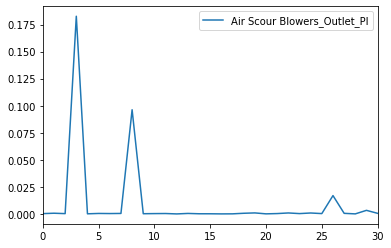

In [57]:
data_frame.plot()

We can get the data for multiple tags simulataneously like so

In [58]:
#fetch the data for all the tags we found
tag_names =  list(map(lambda x: x["Id"], tags))
#fetch the data for all the tags we found
    
many_data = data_core.get_data(dsn, tag_names, "interp", "*-30d", "*", "1d")

many_data_frame = utility.query_result_to_data_frame(many_data)

In [59]:
many_data_frame

,LP FG Header_PI,CALC_Scaled_HP Flare Header Wet_PI,Demulsifier L.P. Inj Pump B_PI,FG Filter B_PI,Corrosion Inhibitor HP Inj Pump B_PI,Biocide (Oil) Inj Pump A_PI,LP Flare Tip_FG Purge_PI,Antifoam Inj Pump A_PI,Gas Export_PI,LP Flare KO Drum Pump B_Disc_PI,...,FG Filter A_PI,HM EX Drum_PI,HP FG Heater_SS Out_PI,Anti-Scalent Pump B_PI,CIP Cartridge Filter_PI,Flotation Cell A_PI,LP Degasser_PI,Coagulant Inj Pump A_PI,HP FG Scrubber_PI,LP Flare KO Drum Pump C_Disc_PI
0,6.156021,6.093681,26.637512,0.821755,4.614258,0.405018,6.393829,25.158300,328.389600,0.442533,...,39.542480,9.518780,12.225802,2.503404,0.082220,1.564325,1.378837,3.363037,39.621286,0.407692
1,5.752628,6.050000,26.280254,1.002303,4.284668,0.399931,5.859384,22.447704,328.329188,-0.047119,...,39.462728,9.588404,12.211825,3.043750,-0.194991,1.627353,1.362710,3.383789,39.514738,-0.046875
2,5.846375,4.926422,25.474802,1.122995,0.512695,0.365295,5.817582,23.939210,328.443100,0.415946,...,39.558876,8.916845,11.467727,5.779353,-0.262083,1.582575,1.396163,3.363037,39.640454,0.381654
3,6.089904,5.735607,24.098906,1.243311,84.154506,0.379911,5.952189,24.014824,328.071200,0.470699,...,39.572793,9.708354,12.232237,6.225783,3.017403,1.571195,1.389445,3.363037,39.582661,0.434898
4,6.152881,5.735338,22.240123,1.364051,80.040798,0.434376,6.110010,23.929367,328.407805,0.414394,...,39.505141,9.247966,11.792270,3.928228,3.366838,1.622396,1.397376,3.350182,39.552652,0.379918
5,5.983755,5.867574,28.014063,1.484470,4.742432,0.368604,5.838522,24.136960,328.078013,0.443324,...,39.549473,9.697284,12.253542,5.265994,-0.315365,1.594630,1.377634,3.382568,39.579921,0.409667
6,6.174590,6.942077,27.565163,1.664897,0.446634,0.399301,6.024716,24.185350,328.536647,0.488159,...,39.530575,9.536832,12.125722,5.330101,-0.197643,1.640055,1.399757,3.405135,39.568304,0.451916
7,5.842605,5.519465,25.134677,0.339672,4.295828,0.409214,5.836807,22.954492,328.361500,0.465946,...,39.529810,9.607772,12.212038,3.439208,-0.005632,1.650135,1.377027,3.303067,39.576743,0.429605
8,6.075344,5.421037,27.009882,0.520938,4.296821,0.447605,6.157857,23.261098,328.794636,0.502294,...,39.556203,9.768658,12.337328,3.750877,0.001947,1.566053,1.400529,3.321533,39.607571,0.468011
9,6.221737,6.152593,26.556708,0.701237,4.760742,0.447364,6.108660,23.854980,328.552500,0.088608,...,39.484064,9.781900,12.385171,3.289615,0.078218,1.624539,1.381197,3.283772,39.541021,0.081108


We can plot it the same way as before

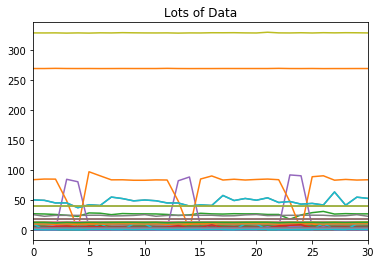

In [60]:
#plot the data frame
many_data_frame.plot(title="Lots of Data", legend=False)

You can also use the "now" function to query the current value of a tag.

In [61]:
snapshot = data_core.get_data(dsn, tag, "now", "*", "*", points=1)

In [62]:
snapshot[0]["tagData"]

[0.000786749]

### Data Processing

This query will get all of the data in the demo "IP Datasource 2"

In [63]:
all_data = data_core.get_data(dsn, tag_names, "raw", "2014-03-03", "2014-03-13", points=239)

all_data_frame = utility.query_result_to_data_frame(all_data)

We can use pandas functions to normalise the data between 0 and 1. This is useful for lot's of data processing applications

In [64]:
normalized_df=(all_data_frame-all_data_frame.min())/(all_data_frame.max()-all_data_frame.min())
normalized_df

,LP FG Header_PI,CALC_Scaled_HP Flare Header Wet_PI,Demulsifier L.P. Inj Pump B_PI,FG Filter B_PI,Corrosion Inhibitor HP Inj Pump B_PI,Biocide (Oil) Inj Pump A_PI,LP Flare Tip_FG Purge_PI,Antifoam Inj Pump A_PI,Gas Export_PI,LP Flare KO Drum Pump B_Disc_PI,...,FG Filter A_PI,HM EX Drum_PI,HP FG Heater_SS Out_PI,Anti-Scalent Pump B_PI,CIP Cartridge Filter_PI,Flotation Cell A_PI,LP Degasser_PI,Coagulant Inj Pump A_PI,HP FG Scrubber_PI,LP Flare KO Drum Pump C_Disc_PI
0,0.837771,0.600829,1.000000,0.916812,0.000000,0.320906,0.992220,0.573157,0.663430,0.187491,...,0.904828,0.986176,0.922679,0.703531,0.024000,0.234902,0.358213,0.967378,0.820779,0.871544
1,0.362925,0.772099,0.774642,0.916812,0.000000,0.349130,0.580197,0.587665,0.698885,0.186953,...,0.759504,0.949309,0.846425,0.726456,0.023982,0.262287,0.504694,0.953174,0.710484,0.871969
2,0.866053,0.690608,0.712378,0.916812,0.000000,0.377353,0.885500,0.586457,0.712738,0.189653,...,0.279165,0.882488,0.782882,0.625142,0.023963,0.289671,0.412322,0.938971,0.310710,0.880282
3,0.842093,0.762431,0.818593,0.916812,0.000000,0.405576,0.705644,0.567111,0.650731,0.194125,...,0.677773,0.809908,0.685450,0.530850,0.023945,0.319924,0.801464,0.924767,0.669151,0.910780
4,0.593867,0.587017,0.675967,0.958420,0.000000,0.433799,0.878878,0.559857,0.725532,0.195931,...,0.281427,0.801843,0.722514,0.592626,0.023927,0.659630,0.480289,0.910564,0.421005,0.915623
5,0.713672,0.810773,0.753528,0.958420,0.003220,0.462023,0.508244,0.586457,0.722669,0.199231,...,0.575250,0.751152,0.681208,0.602201,0.023699,0.379549,0.783814,0.896360,0.503708,0.930523
6,0.983386,0.790055,0.844447,0.958420,0.003220,0.464561,0.921064,0.584040,0.737282,0.200093,...,0.734450,0.863051,0.783941,0.624559,0.023183,0.294402,0.824743,0.886982,0.684698,0.936619
7,0.751493,0.665746,0.678122,0.958420,0.003220,0.455020,1.000000,0.567111,0.673425,0.196925,...,0.747020,0.991935,0.958693,0.813787,0.022667,0.241144,0.382800,0.886982,0.710484,0.917393
8,0.349703,0.683702,0.686955,0.958420,0.003220,0.445480,0.596843,0.574365,0.747355,0.188407,...,0.306394,0.993088,0.886674,0.943227,0.022151,0.613459,0.478981,0.886982,0.255562,0.886172
9,0.991654,0.698895,0.723366,0.958420,0.003220,0.435939,0.579882,0.564691,0.722970,0.196293,...,0.589430,0.968894,0.905665,0.883206,0.928928,0.689226,0.396758,0.886982,0.614003,0.916528


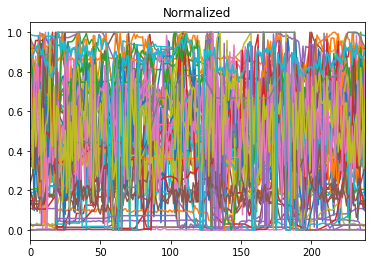

In [65]:
#plot the data frame
normalized_df.plot(title="Normalized", legend=False)

Now that the data is normalised we can use it as the training and testing data for a multi layer perceptron.

In [66]:
from sklearn.neural_network import MLPRegressor

Seperate the data into seperate trainigna and testing parts

In [67]:
training_input = normalized_df.iloc[:-10,:-1]
training_output = normalized_df.iloc[:-10,-1]

testing_input = normalized_df.iloc[-10:,:-1]
testing_output = normalized_df.iloc[-10:,-1]

We can define the model and train it on our data

In [68]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [69]:
clf.fit(training_input, training_output)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(5, 2), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

We can then use the model to make predications about the unseen testing data

In [70]:
prediction = clf.predict(testing_input)

Create a data frame to compare the models prediction to the actual output from the testing data

In [71]:
prediction_df = pd.DataFrame({ "actual": testing_output, "prediction": prediction})
prediction_df

,actual,prediction
229,0.836420,0.857154
230,0.919342,0.913153
231,0.869016,0.877038
232,0.940707,0.931621
233,0.887283,0.884257
234,0.891741,0.893015
235,0.871544,0.866876
236,0.871969,0.870719
237,0.880282,0.877083
238,0.910780,0.912855


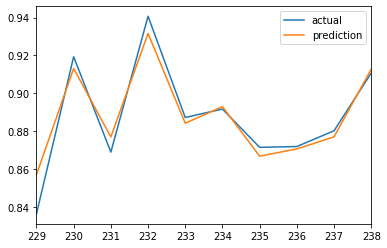

In [72]:
prediction_df.plot()